# Method

The linear function should be like:
$$y=mx+b$$
We first intial $m$ and $b$, then calculate the SSE(Sum of Squares for Error):
$$Error_{(m,b)}=\dfrac{1}{N}\sum\limits_{n=1}^{N}[ y_i-(mx_i+b)]^2$$
The partial derivates:
$$\dfrac{\partial Error}{\partial m}=-\dfrac{2}{N} \sum\limits_{n=1}^N x_i[ y_i-(mx_i+b)]$$
$$\dfrac{\partial Error}{\partial b}=-\dfrac{2}{N} \sum\limits_{n=1}^N [ y_i-(mx_i+b)]$$
Using the Gradient Descent Mothed,
$$m'=m-\dfrac{\partial Error}{\partial m}\times LearningRate$$
$$b'=b-\dfrac{\partial Error}{\partial b}\times LearningRate$$
$s.t.$
$$Error_{m',b'}< Error_{m,b}$$
Repeat above steps for $Num\_Iterations$ times.

# Programming

## Initialization

In [4]:
import numpy as np


# 超参数hyperparameters
learning_rate=0.0001
initial_b=0
initial_m=0
num_iterations=1000

## GD for linear regression

In [24]:
def gradient_descent_runner(points,starting_b,starting_m,learningRate,iterations):
    b=starting_b
    m=starting_m
    for i in range(iterations):
        b,m=step_gradient(b,m,array(points),learningRate)
    return [b,m]

In [27]:
def step_gradient(b_current,m_current,points,learningRate):
    b_gradient=0
    m_gradient=0
    N=float(len(points))
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1]
        b_gradient+=-(2/N)*(y-((m_current*x)+b_current))
        m_gradient+=-(2/N)*x*(y-((m_current*x)+b_current))
    new_b=b_current-(learningRate*b_gradient)
    new_m=m_current-(learningRate*m_gradient)
    return [new_b,new_m]

## Error function

In [7]:
def compute_error_value(b,m,points):
    total_error=0
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1]
        total_error+=(y-(m*x+b))**2
    return total_error/ float(len(points))

## Main

In [31]:
points=np.genfromtxt('linear_regression_data.csv',delimiter=',')
[b,m]=gradient_descent_runner(points,initial_b,initial_m,learning_rate,num_iterations*10)
print(b)
print(m)
error=compute_error_value(b,m,points)
print(error)

0.607898599705
1.46754404363
112.315334271


## Visualization

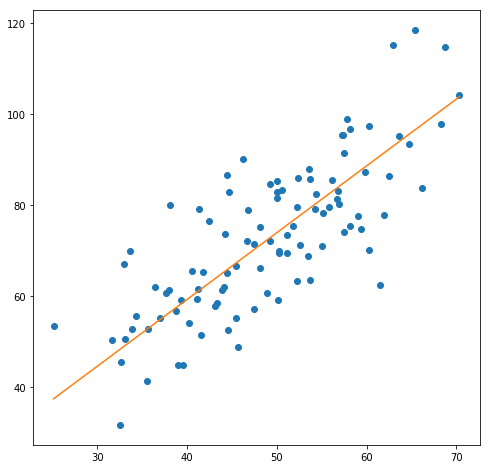

In [51]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.plot(points[:,0],points[:,1],'o')
x=np.linspace(np.min(points[:,0]),np.max(points[:,0]),1000)
ax.plot(x,b+x*m)
plt.show()